# Trabajo práctico integrador

**Nombre**: LUCIANO M. C. SMITH

## Primera Parte (Clase 1 y 2)

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

RANDOM_STATE = 46


### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [176]:
# Función implementada para el cálculo de las normas. El parámetro de entrada es una matriz de numpy.

def norm_l(m):
  
  l0 = np.zeros((m.shape[0]))
  l1 = np.zeros((m.shape[0]))
  l2 = np.zeros((m.shape[0]))
  li = np.zeros((m.shape[0]))
  
  m = np.absolute(m)
  
  for i in range(m.shape[0]):     
    li[i] = li[i] + m[i,:].max()  
    for j in range(m.shape[1]):   
      l0[i] = l0[i] + m.item(i,j) if (m.item(i,j)!=0) else l0[i]  # NORMA L0
      l1[i] = l1[i] + (m.item((i,j))**1)      # NORMA L1
      l2[i] = l2[i] + (m.item((i,j))**2)      # NORMA L2

  l1[i] = l1[i]**(1/1)
  l2[i] = l2[i]**(1/2)
  
  return l0,l1,l2,li

# Prueba de la función.

a = np.array([[1, 1],[-2, 0],[-1,4]])
norm_l(a)

(array([2., 2., 5.]),
 array([2., 2., 5.]),
 array([2.        , 4.        , 4.12310563]),
 array([1., 2., 4.]))

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [177]:
truth = np.array     ([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

TP = np.sum(truth&prediction)
TN = np.sum(np.logical_not(truth)&np.logical_not(prediction))
FP = np.sum(np.logical_not(truth)&prediction)
FN = np.sum(truth&np.logical_not(prediction))

print("TP : ", TP)
print("TN : ", TN)
print("FP : ", FP)
print("FN : ", FN)

print("Precision = TP / (TP + FP): ", (TP/(TP+FP)))
print("Recall = TP / (TP + FN): ",(TP/(TP+FN)))
print("Accuracy = (TP + TN) / (TP + TN + FP + FN): ",(TP+TN)/(TP+FP+TN+FN))


TP :  3
TN :  1
FP :  3
FN :  3
Precision = TP / (TP + FP):  0.5
Recall = TP / (TP + FN):  0.5
Accuracy = (TP + TN) / (TP + TN + FP + FN):  0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

#### EJERCICIO 3

In [178]:
# Cargo el dataset HAR (https://archive.ics.uci.edu/ml/machine-learning-databases/00240/)

X_train = np.loadtxt("./UCI HAR Dataset/train/X_train.txt")
X_test = np.loadtxt("./UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("./UCI HAR Dataset/test/y_test.txt").astype(int)
y_train = np.loadtxt("./UCI HAR Dataset/train/y_train.txt").astype(int)
y_labels = pd.read_csv("./UCI HAR Dataset/activity_labels.txt", sep=" ", header=None)
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep=" ", header=None)


df = pd.DataFrame(data=X_train)

# Cambio el nombre de las columnas
for row in features.iterrows():
    df = df.rename({(row[1][0])-1: row[1][1]}, axis=1)

# Tipos de actividades (y)
y_labels.head(10)

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [179]:
# (1) Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

print(X_train.shape)

# Estandarizo el set de entrenamiento.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Aplico PCA 
pca1 = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca1.transform(X_scaled)

# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios: ", X_pca.shape[1])

(7352, 561)
Cantidad de componentes necesarios:  26


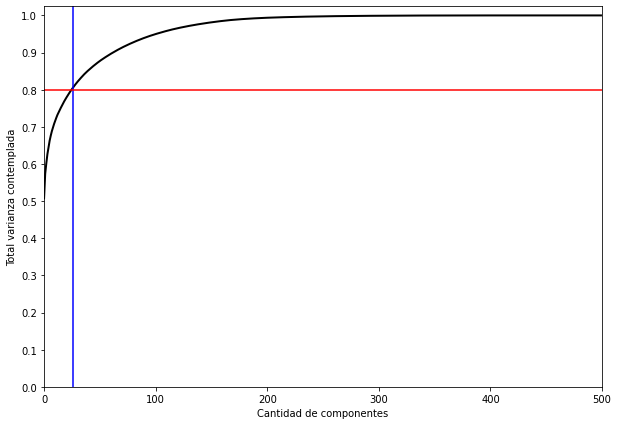

In [180]:

#2. Gráficar la variación acumulada.

pca_temp = PCA(n_components=500, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 500)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show()


In [181]:
# 3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) 
# y agrupar en clusters de k=6. Luego probar con k=2.

n_clases = 6
kmeans6 = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans6.fit(X_pca)
cluster_labels6 = kmeans6.labels_


n_clases = 2
kmeans2 = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans2.fit(X_pca)
cluster_labels2 = kmeans2.labels_


Text(0.5, 1.0, 'PCA projection 3D - K=2')

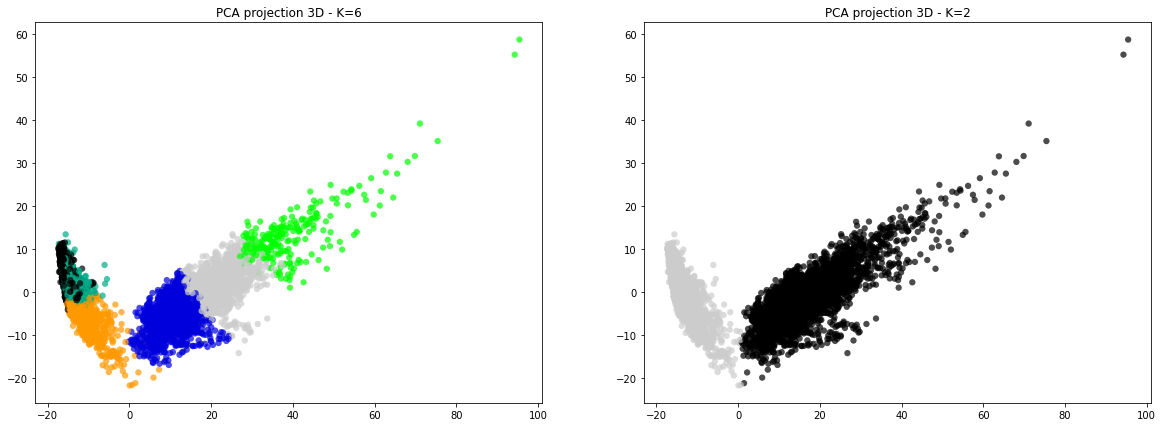

In [182]:
# 4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels6, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
ax1.set_title('PCA projection 3D - K=6')

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels2, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
ax2.set_title('PCA projection 3D - K=2')


In [183]:
# Analizo el dataset sin aplicar PCA
n_clases = 6
kmeans6_sinPCA = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans6_sinPCA.fit(X_scaled)




KMeans(n_clusters=6, n_init=100, random_state=46)

In [184]:
# Ahora, analizo los la performance de los modelos.

# ***************************************************************************************
# * NOTA: Si bien se utilizó el gráfico de la matriz de confusión, las etiquetas del eje 
#         "predicted label" deberia decir clase_0, clase_1, clase_2, ..., clase_n.
# ***************************************************************************************


def m_conf(km, X, Y, labels):
    y = km.predict(X)+1
    cm = confusion_matrix(Y, y)
    print("DIFERENTES RESULTADOS PREDICCION : ", np.unique(y))
    print("DIFERENTES RESULTADOS VALORES REALES : ", np.unique(Y))
    print("TAMAÑO DEL DATASET : ", y.size)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()


In [185]:
# Estandarizo el set de prueba.
scaler = StandardScaler()
X_test_sc = scaler.fit_transform(X_test)

# Aplico la reducción de componentes al set de prueba.
X_test1_red = pca1.transform(X_test_sc)

GRAFICO 1. CON APLICACION DE PCA Y K = 6
DIFERENTES RESULTADOS PREDICCION :  [1 2 3 4 5 6]
DIFERENTES RESULTADOS VALORES REALES :  [1 2 3 4 5 6]
TAMAÑO DEL DATASET :  2947


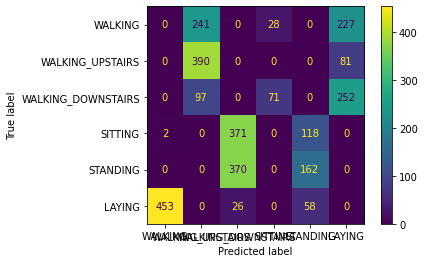

In [186]:
print("GRAFICO 1. CON APLICACION DE PCA Y K = 6")
m_conf(kmeans6, X=X_test1_red, Y=y_test, labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING','STANDING', 'LAYING'])


GRAFICO 2. CON APLICACION DE PCA Y K = 2
DIFERENTES RESULTADOS PREDICCION :  [1 2]
DIFERENTES RESULTADOS VALORES REALES :  [1 2 3 4 5 6]
TAMAÑO DEL DATASET :  2947


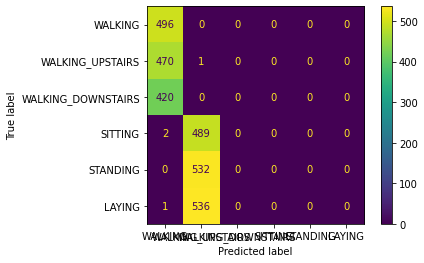

In [187]:
print("GRAFICO 2. CON APLICACION DE PCA Y K = 2")
m_conf(kmeans2, X_test1_red, y_test, labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING','STANDING', 'LAYING'])

GRAFICO 3. SIN PCA Y K = 6
DIFERENTES RESULTADOS PREDICCION :  [1 3 4 5]
DIFERENTES RESULTADOS VALORES REALES :  [1 2 3 4 5 6]
TAMAÑO DEL DATASET :  2947


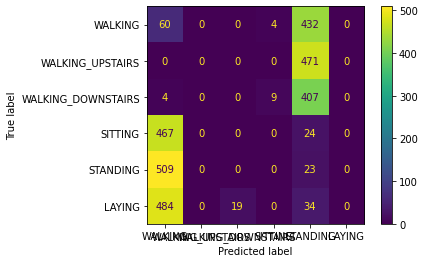

In [188]:
print("GRAFICO 3. SIN PCA Y K = 6")
m_conf(kmeans6_sinPCA, X_test, y_test, labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING','STANDING', 'LAYING'])


Del análisis anterior puedo decir que el algoritmo de kmeans aplicado con K=6 y tras la aplicación de PCA puede indentificar la actividad LAYING pero tiene problemas al indenfificar las actividades que implican caminar entre sí (WALKING, UPSTAIRS, DOWNSTAIRS) y las actividades que implican estar quieto entre sí (SITTING y STANDING), gráfico 1.


En cambio, cuando se reduce la cantidad de clusters a 2, el algoritmo identifica claramente y con un buen score dos grupos: actividades que implican movimiento y actividades que no implican movimiento, gráfico 2.

#### 5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

Desde el punto de vista de la ejecución del algoritmo, la reduccion de las dimensiones del dateset tras la aplicación de PCA hizo que, logicamente, los procesos posteriores se ejecutasen a mayor velocidad.

Pero además, y comparando los gráficos 1 y 3, la reducción de componentes del dataset por medio de PCA, permitió encontrar mas cantidad de clusters y mejor definidos que, la aplicación de KMeans sin PCA la cual permitió diferenciar principalemente solo dos clusters en el dataset de TEST pese a que k=6.

Con este dataset, la aplicación de PCA y KMeans con K=2 logró una clusterización similar a la lograda sin PCA y KMeans con K=6 pero a una mayor velocidad.

#### EJERCICIO 4

In [189]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X_data = pd.DataFrame(data=digits.data)
y_data = pd.DataFrame(data=digits.target)

print(X_data.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, y_data, test_size=0.2, random_state = RANDOM_STATE)

print(X_train2.shape)
print(X_test2.shape)


(1797, 64)
(1437, 64)
(360, 64)


In [190]:
# (1) Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 46

# Estandarizo el set de entrenamiento.
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_train2)

# Aplico PCA 
pca2 = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled2)
X_pca2 = pca2.transform(X_scaled2)

# Cantidad de componentes necesarios
print("Cantidad de componentes necesarios: ", X_pca2.shape[1])


Cantidad de componentes necesarios:  20


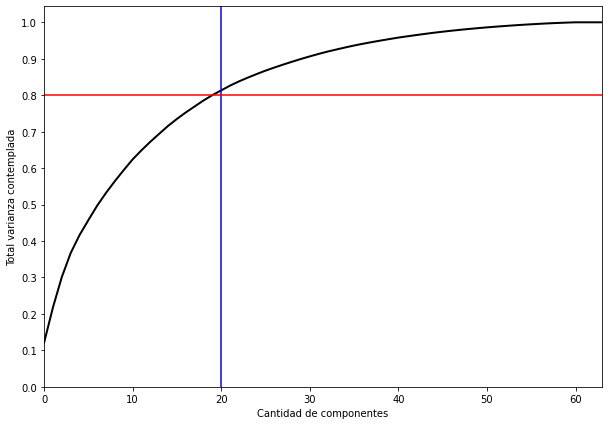

In [191]:
#2. Gráficar la variación acumulada.

pca_temp = PCA(n_components=64, random_state=RANDOM_STATE).fit(X_scaled2)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c='b')
plt.axhline(0.8, c='r')
plt.show()

In [192]:
# 3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) 
# y agrupar en clusters de k=10. Luego probar con k=2.

from sklearn.cluster import KMeans

n_clases = 10
kmeans10_2 = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans10_2.fit(X_pca2)
cluster_labels10_2 = kmeans10_2.labels_


n_clases = 2
kmeans2_2 = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans2_2.fit(X_pca2)
cluster_labels2_2 = kmeans2_2.labels_


Text(0.5, 1.0, 'PCA projection 2D - K=2')

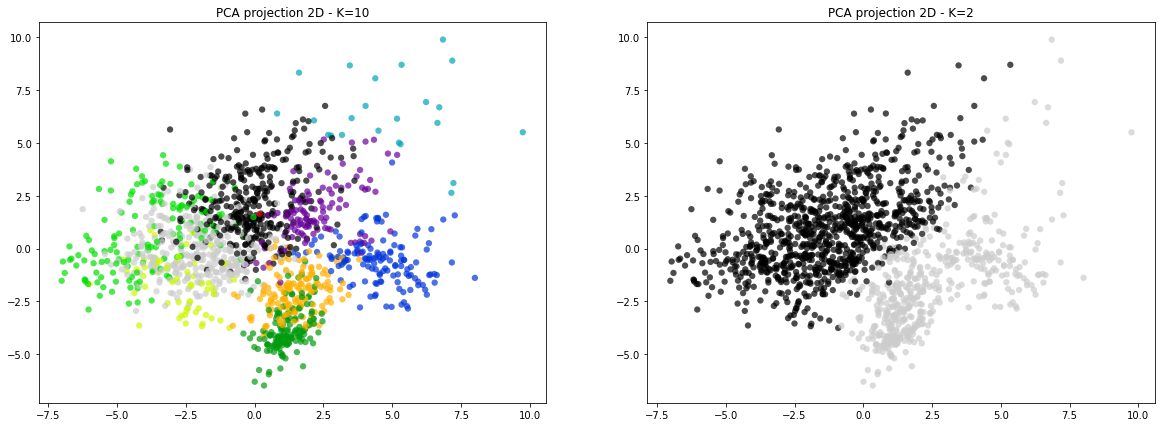

In [193]:
# 4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))

ax1.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels10_2, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax1.set_title('PCA projection 2D - K=10')

ax2.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels2_2, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
ax2.set_title('PCA projection 2D - K=2')


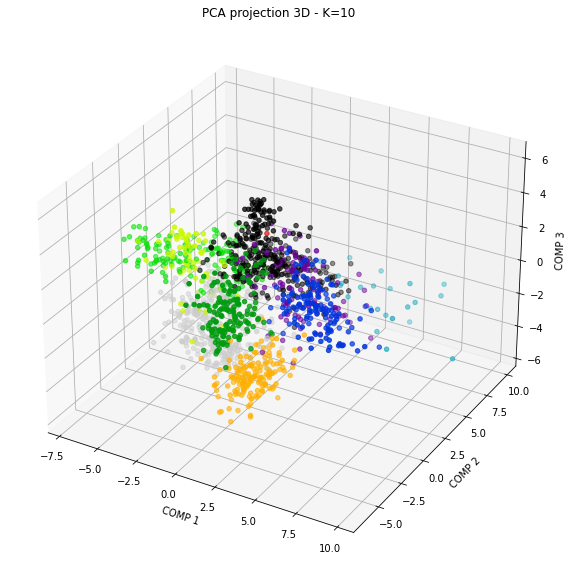

In [194]:
# Analizó si la separación de las clases se puede ver mejor en una gráfica 3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.set_title('PCA projection 3D - K=10')

xs = X_pca2[:, 0]
ys = X_pca2[:, 1]
zs = X_pca2[:, 2]
ax.scatter(xs, ys, zs, marker='o', c=cluster_labels10_2, cmap=plt.cm.get_cmap('nipy_spectral', 10))

ax.set_xlabel('COMP 1')
ax.set_ylabel('COMP 2')
ax.set_zlabel('COMP 3')

plt.show()

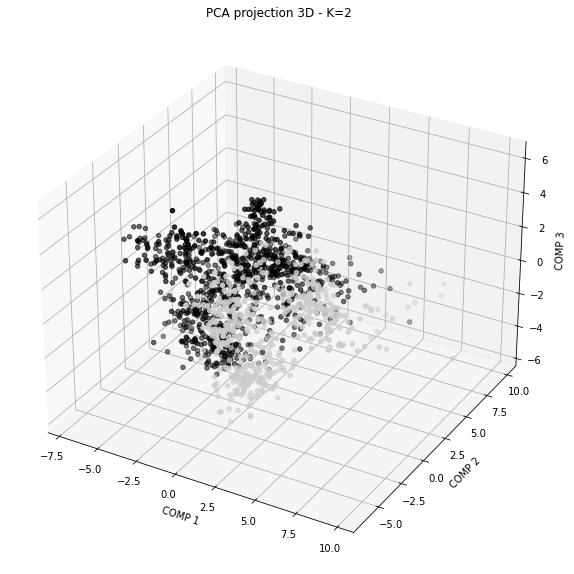

In [195]:
# Analizó si la separación de las clases se puede ver mejor en una gráfica 3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.set_title('PCA projection 3D - K=2')

xs = X_pca2[:, 0]
ys = X_pca2[:, 1]
zs = X_pca2[:, 2]
ax.scatter(xs, ys, zs, marker='o', c=cluster_labels2_2, cmap=plt.cm.get_cmap('nipy_spectral', 2))

ax.set_xlabel('COMP 1')
ax.set_ylabel('COMP 2')
ax.set_zlabel('COMP 3')

plt.show()

In [196]:
# Analizo el dataset sin aplicar PCA

n_clases = 10
kmeans10_sinPCA = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans10_sinPCA.fit(X_train2)


KMeans(n_clusters=10, n_init=100, random_state=46)

In [197]:
# Estandarizo el set de prueba.

scaler2 = StandardScaler()
X_test2_sc = scaler2.fit_transform(X_test2)

print(X_test2.shape)

# Aplico la reducción de componentes al set de prueba.
X_test2_red = pca2.transform(X_test2_sc)


(360, 64)


GRAFICO 4. CON PCA Y K = 10
DIFERENTES RESULTADOS PREDICCION :  [ 1  2  3  4  5  6  7  8 10]
DIFERENTES RESULTADOS VALORES REALES :  [ 1  2  3  4  5  6  7  8  9 10]
TAMAÑO DEL DATASET :  360


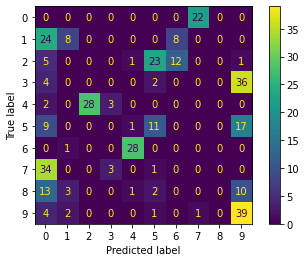

In [198]:
print("GRAFICO 4. CON PCA Y K = 10")
m_conf(kmeans10_2, X_test2_red, y_test2+1, [str(i) for i in range(10)])

GRAFICO 5. CON PCA Y K = 2
DIFERENTES RESULTADOS PREDICCION :  [1 2]
DIFERENTES RESULTADOS VALORES REALES :  [ 1  2  3  4  5  6  7  8  9 10]
TAMAÑO DEL DATASET :  360


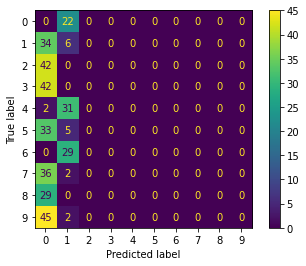

In [199]:
print("GRAFICO 5. CON PCA Y K = 2")
m_conf(kmeans2_2, X_test2_red, y_test2+1, [str(i) for i in range(10)])

GRAFICO 6. CON PCA Y K = 10
DIFERENTES RESULTADOS PREDICCION :  [ 1  2  3  4  5  6  7  8  9 10]
DIFERENTES RESULTADOS VALORES REALES :  [ 1  2  3  4  5  6  7  8  9 10]
TAMAÑO DEL DATASET :  360


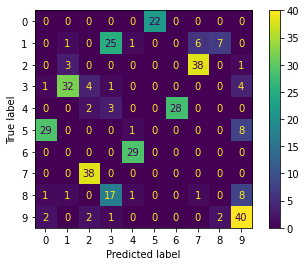

In [200]:
print("GRAFICO 6. CON PCA Y K = 10")
m_conf(kmeans10_sinPCA, X_test2, y_test2+1, [str(i) for i in range(10)])

#### 5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

A diferencia de lo encontrado en con el dataset del ejercicio anteriorm en este caso, más allá de la reducción del tamaño del dataset y el aumento de velocidad, no se encontrarón ventajas a la hora de aplicar PCA antes de KMeans. Como se puede ver comparando el gráfico 4 y 6, la información del algoritmo de KMeans con K=10, es notoriamente mejor a la hora de clasificar el set de datos cuando no se aplica PCA.

## Segunda Parte (Clase 3 y 4)

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [202]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape


(1000, 2)

In [203]:
df = pd.DataFrame(new_data)

df

,0,1
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314
...,...,...
995,-1.918771,-30.210145
996,0.482472,9.182647
997,0.241962,4.855134
998,1.366874,25.785771


In [204]:
new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


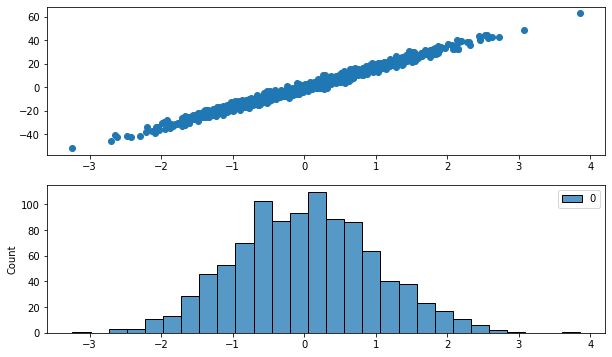

In [205]:
fig,axes = plt.subplots(2,figsize=(10,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [206]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [207]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

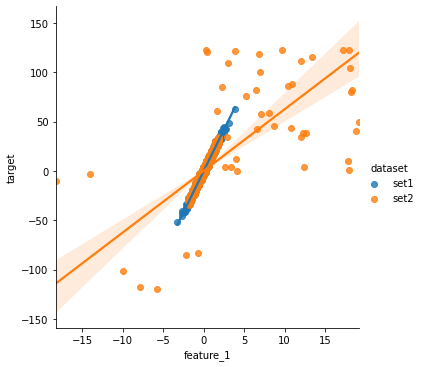

In [208]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [209]:
def split(df: np.ndarray):
    
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]

    permutacion = np.random.permutation(X.shape[0])

    indices_train = permutacion[0:int(0.7 * X.shape[0])]
    indices_val =  permutacion[int(0.7 * X.shape[0]): int(0.9 * X.shape[0])]
    indices_test = permutacion[int(0.9 * X.shape[0]):]

    X_train = X.iloc[indices_train, :]
    X_val = X.iloc[indices_val, :]                          
    X_test = X.iloc[indices_test, :]

    Y_train = y[indices_train]
    Y_val = y[indices_val] 
    Y_test = y[indices_test]
    return X_train, X_val, X_test, Y_train, Y_val, Y_test
    





### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [210]:
# GENERAR LOS DATASETS 1 y 3!

# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features

#******************************************
n = 1 # cantidad de features para outliers
#******************************************

X, y = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 5,
                       n_informative = 5,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df_a = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df_a.columns:
    if i ==  len(df_a.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df_a.columns = new_col

# (1) - Uno normal con poco 5 `noise` y pocos outliers 1%
df_outlier_1 = generate_outliers(df_a,["feature_" + str(i+1) for i in range(n)], percentage = 0.01, extreme_outlier = True, two_tailed= True)

# (3) - Uno con poco 10 `noise` y muchos outliers 50%
df_outlier_3 = generate_outliers(df_a,["feature_" + str(i+1) for i in range(n)], percentage = 0.5, extreme_outlier = True, two_tailed= True)


In [211]:
# GENERAR LOS DATASETS 2 y 4!
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features

X, y = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 100,
                       n_informative = 5,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df_b = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df_b.columns:
    if i ==  len(df_b.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df_b.columns = new_col

# (2) - Uno con mucho 100 `noise` y pocos outliers 1%
df_outlier_2 = generate_outliers(df_b,["feature_" + str(i+1) for i in range(n)], percentage = 0.01, extreme_outlier = True, two_tailed= True)

# (4) - Uno con mucho 100 `noise` y muchos outliers 50%
df_outlier_4 = generate_outliers(df_b,["feature_" + str(i+1) for i in range(n)], percentage = 0.5, extreme_outlier = True, two_tailed= True)

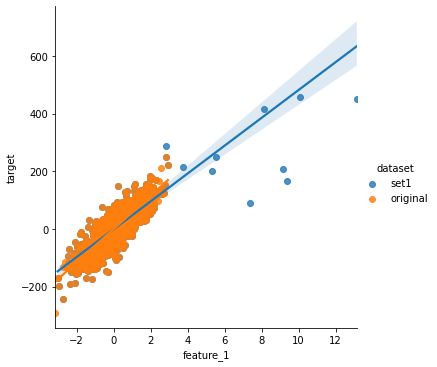

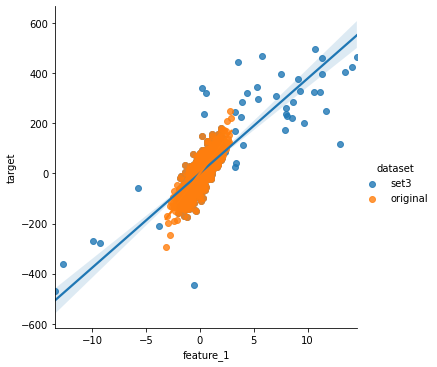

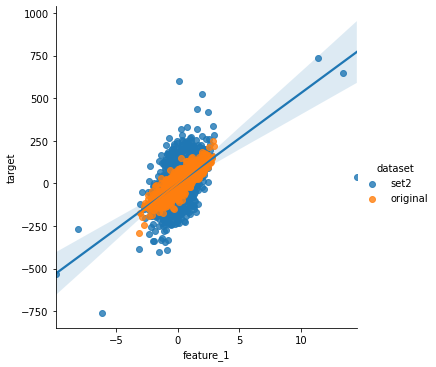

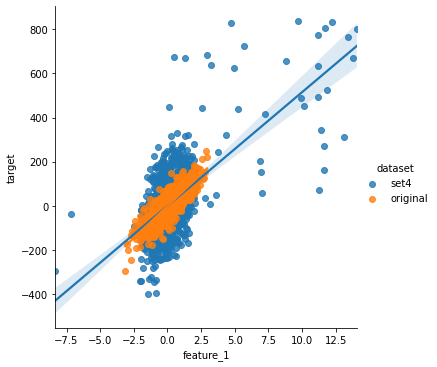

In [212]:
# Análisis del dataset

sns.lmplot(data = pd.concat([df_outlier_1.assign(dataset = 'set1'), df_a.assign(dataset = 'original')]), x = 'feature_1', y = 'target', hue = 'dataset')

sns.lmplot(data = pd.concat([df_outlier_3.assign(dataset = 'set3'), df_a.assign(dataset = 'original')]), x = 'feature_1', y = 'target', hue = 'dataset' )

sns.lmplot(data = pd.concat([df_outlier_2.assign(dataset = 'set2'), df_a.assign(dataset = 'original')]), x = 'feature_1', y = 'target', hue = 'dataset' )

sns.lmplot(data = pd.concat([df_outlier_4.assign(dataset = 'set4'), df_a.assign(dataset = 'original')]), x = 'feature_1', y = 'target', hue = 'dataset' )

In [213]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [214]:
def doit(X_train, X_test, y_train, y_test):
    if 'target' in X_test: X_test = X_test.drop(['target'], axis=1)
    regresionLineal = LinearRegression()
    regresionLineal.fit(X_train, y_train)
    regresionLineal_pred = regresionLineal.predict(X_test)
    df_lr = pd.DataFrame(X_test)
    df_lr["target"] = regresionLineal_pred

    if 'target' in X_test: X_test = X_test.drop(['target'], axis=1)
    huberRegressor = HuberRegressor()
    huberRegressor.fit(X_train, y_train)
    HuberRegressor_pred = huberRegressor.predict(X_test)
    df_hr = pd.DataFrame(X_test)
    df_hr["target"] = HuberRegressor_pred

    if 'target' in X_test: X_test = X_test.drop(['target'], axis=1)
    elasticNetCV = ElasticNetCV()
    elasticNetCV.fit(X_train, y_train)
    elasticNetCV_pred = elasticNetCV.predict(X_test)
    df_en = pd.DataFrame(X_test)
    df_en["target"] = elasticNetCV_pred

    if 'target' in X_test: X_test = X_test.drop(['target'], axis=1)
    lasso = LassoCV()
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    df_la = pd.DataFrame(X_test)
    df_la["target"] = lasso_pred


    rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = regresionLineal_pred, squared = False)
    R2 = metrics.r2_score(y_test, regresionLineal_pred)

    print("REGRESION LINEAL")
    print(f"El error (rmse) de test es: {rmse_ols}")
    print(f"R^2 es: {R2}")

    sns.lmplot(data = pd.concat([df_lr.assign(dataset = 'predicción'), df_a.assign(dataset = 'original'), df_outlier_1.assign(dataset = 'alterado')]), x = 'feature_1', y = 'target', hue = 'dataset', scatter_kws={'alpha': 0.1})

    rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = HuberRegressor_pred, squared = False)
    R2 = metrics.r2_score(y_test, HuberRegressor_pred)

    print("HUBER REGRESSOR")
    print(f"El error (rmse) de test es: {rmse_ols}")
    print(f"R^2 es: {R2}")

    sns.lmplot(data = pd.concat([df_hr.assign(dataset = 'predicción'), df_a.assign(dataset = 'original'), df_outlier_1.assign(dataset = 'alterado')]), x = 'feature_1', y = 'target', hue = 'dataset', scatter_kws={'alpha': 0.1})

    rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = elasticNetCV_pred, squared = False)
    R2 = metrics.r2_score(y_test, elasticNetCV_pred)

    print("ELASTICNETCV")
    print(f"El error (rmse) de test es: {rmse_ols}")
    print(f"R^2 es: {R2}")

    sns.lmplot(data = pd.concat([df_en.assign(dataset = 'predicción'), df_a.assign(dataset = 'original'), df_outlier_1.assign(dataset = 'alterado')]), x = 'feature_1', y = 'target', hue = 'dataset', scatter_kws={'alpha': 0.1})

    rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = lasso_pred, squared = False)
    R2 = metrics.r2_score(y_test, lasso_pred)

    print("LASSOCV REGRESSION")
    print(f"El error (rmse) de test es: {rmse_ols}")
    print(f"R^2 es: {R2}")

    sns.lmplot(data = pd.concat([df_la.assign(dataset = 'predicción'), df_a.assign(dataset = 'original'), df_outlier_1.assign(dataset = 'alterado')]), x = 'feature_1', y = 'target', hue = 'dataset', scatter_kws={'alpha': 0.1})



REGRESION LINEAL
El error (rmse) de test es: 93.32635627301336
R^2 es: 0.20463486256168684
HUBER REGRESSOR
El error (rmse) de test es: 103.42452145388474
R^2 es: 0.02320152916741236
ELASTICNETCV
El error (rmse) de test es: 92.33166467413626
R^2 es: 0.22149884330073188
LASSOCV REGRESSION
El error (rmse) de test es: 93.0459044241252
R^2 es: 0.20940792935211328


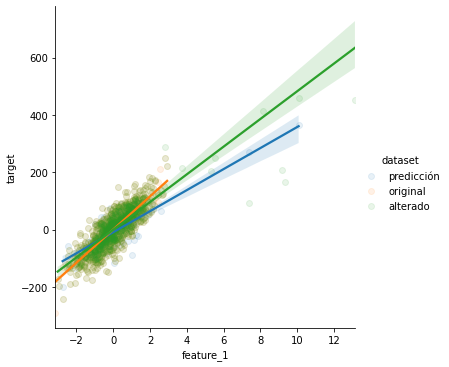

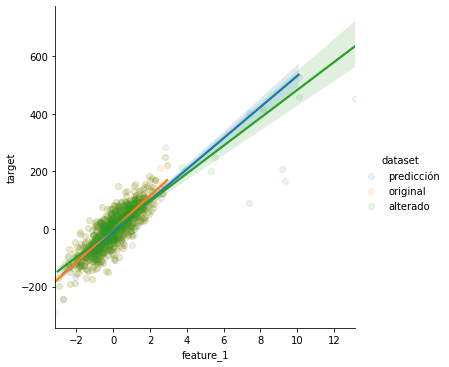

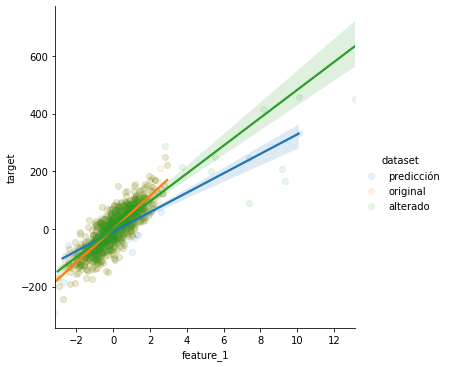

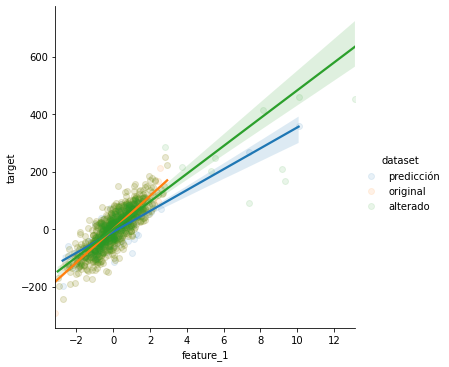

In [215]:
# DATASET 1
X_train_1, X_val_1, X_test_1, Y_train_1, Y_val_1, Y_test_1 = split(df_outlier_1)
doit(X_train_1, X_test_1, Y_train_1, Y_test_1)


REGRESION LINEAL
El error (rmse) de test es: 137.40819700742358
R^2 es: 0.01085300752661511
HUBER REGRESSOR
El error (rmse) de test es: 154.9488169780173
R^2 es: -0.25780142450443844
ELASTICNETCV
El error (rmse) de test es: 134.71119833189584
R^2 es: 0.04930118721266619
LASSOCV REGRESSION
El error (rmse) de test es: 137.02329860505358
R^2 es: 0.016386707560530067


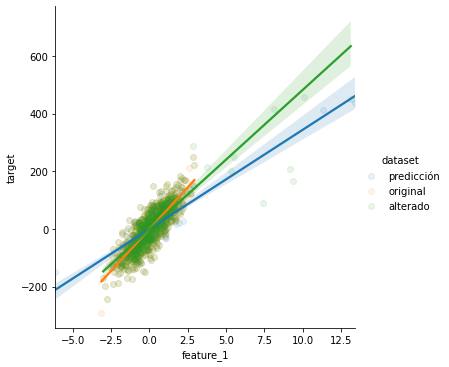

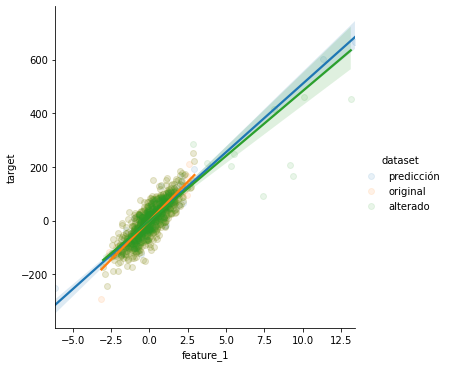

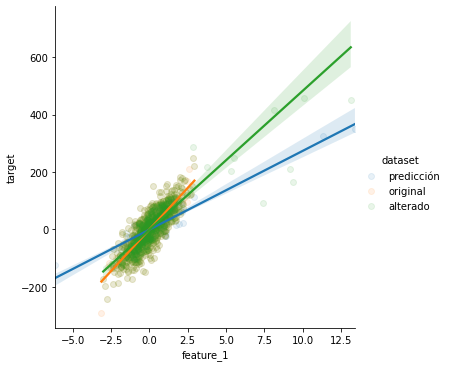

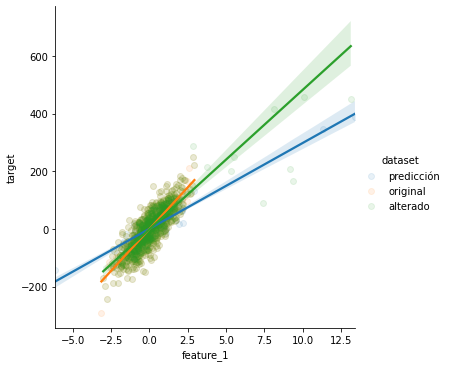

In [216]:
# DATASET 2
X_train_2, X_val_2, X_test_2, Y_train_2, Y_val_2, Y_test_2 = split(df_outlier_2)
doit(X_train_2, X_test_2, Y_train_2, Y_test_2)

REGRESION LINEAL
El error (rmse) de test es: 123.74791686451269
R^2 es: 0.17467324655896854
HUBER REGRESSOR
El error (rmse) de test es: 124.54401996022335
R^2 es: 0.16401999803801182
ELASTICNETCV
El error (rmse) de test es: 125.69464948224959
R^2 es: 0.14850184379260278
LASSOCV REGRESSION
El error (rmse) de test es: 125.19973421571454
R^2 es: 0.1551940901464619


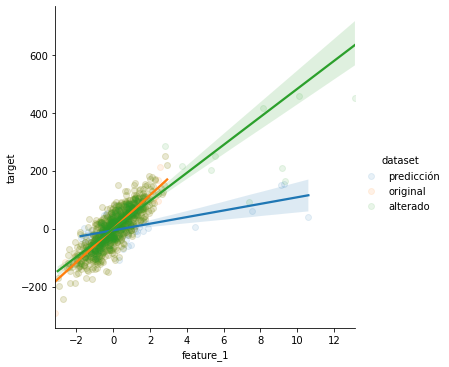

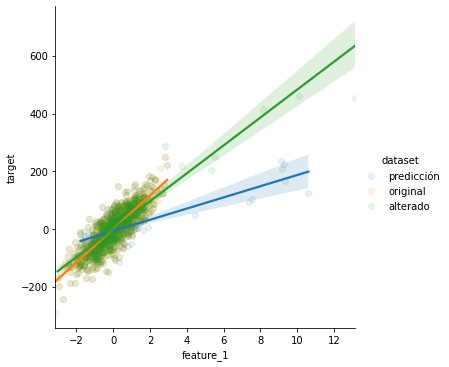

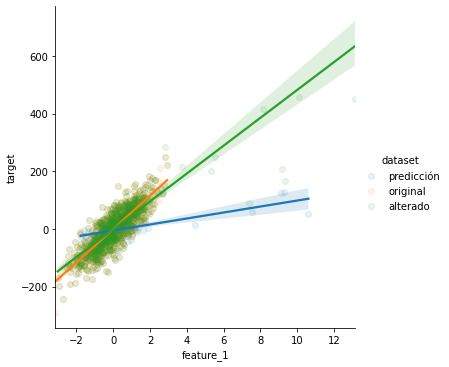

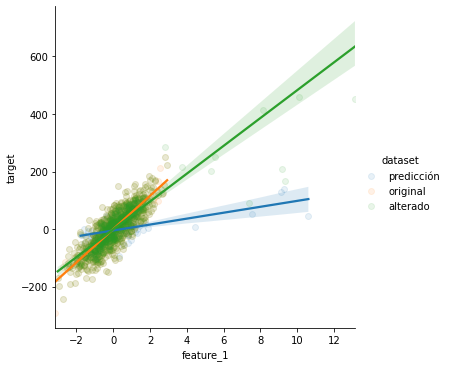

In [217]:
# DATASET 3
X_train_3, X_val_3, X_test_3, Y_train_3, Y_val_3, Y_test_3 = split(df_outlier_3)
doit(X_train_3, X_test_3, Y_train_3, Y_test_3)

REGRESION LINEAL
El error (rmse) de test es: 116.22152088240202
R^2 es: 0.028778172624127074
HUBER REGRESSOR
El error (rmse) de test es: 122.24517510466032
R^2 es: -0.07450583807451472
ELASTICNETCV
El error (rmse) de test es: 116.06601447334884
R^2 es: 0.03137545712753609
LASSOCV REGRESSION
El error (rmse) de test es: 116.15129423664813
R^2 es: 0.029951536113618782


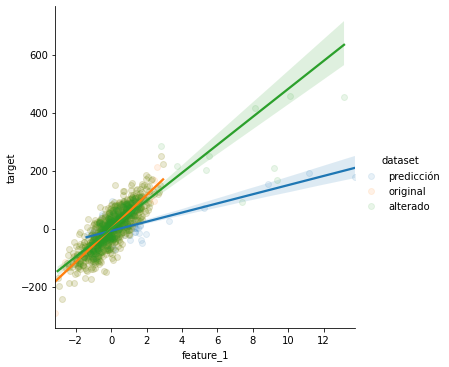

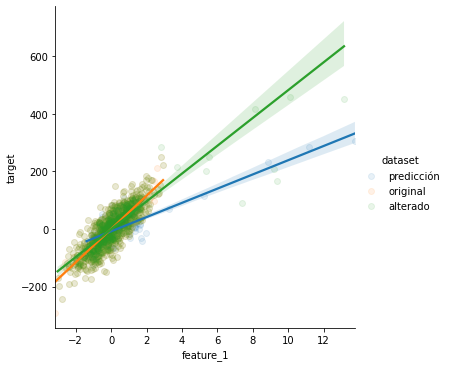

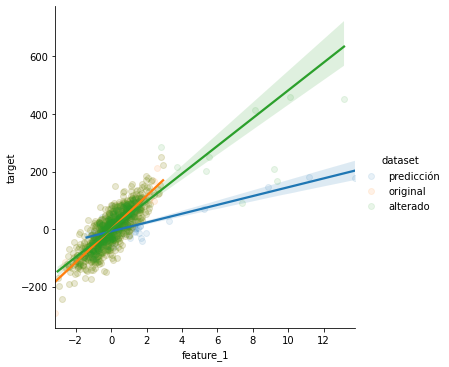

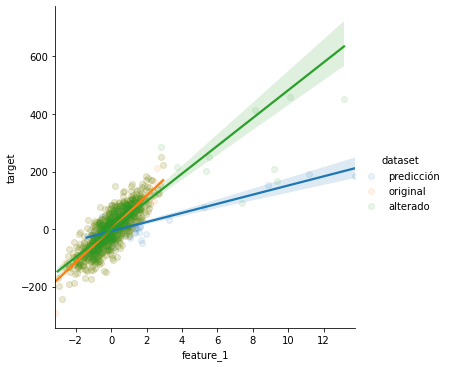

In [218]:
# DATASET 4
X_train_4, X_val_4, X_test_4, Y_train_4, Y_val_4, Y_test_4 = split(df_outlier_4)
doit(X_train_4, X_test_4, Y_train_4, Y_test_4)

#### Comparación y análisis de resultados:
Se probaron: REGRESION LINEAL, HUBER REGRESSOR, ELASTICNETCV y LASSOCV en los cuatro datasets generados. Para los ensayos se generaron outliers unicamente en la feature 1 (aunque se creo el parámetro n que permite generar outliers en las demás features). Respecto a los resultados, una ejecución de los algoritmos generó los siguientes resultados: 

| Método | Dataset1 - RMSE | Dataset1 - $R^2$ | Dataset2 - RMSE | Dataset2 - $R^2$ | Dataset3 - RMSE | Dataset3 - $R^2$ | Dataset4 - RMSE | Dataset4 - $R^2$ |
|----------|----------|----------|:----------:|----------|----------|----------|----------|----------|
| Linear Regression | 93.32   | 0.2046   | 137.41   | 0.0108   | ***123.75**   | ***0.1747**   | 116.22   | 0.0288   |
| Huber Regressor   | 103.42   | 0.0232   | 154.95   |-0.2578   | 124.54   | 0.1641   | 122.24   |-0.0745   |
| ElasticNetCV      | ***92.33**   | ***0.2215**   | ***134.71**   | ***0.0493**   | 125.69   | 0.1485   | ***116.07**   | ***0.0313**   |
| LassoCV           | 93.04   | 0.2094   | 137.03   | 0.0163   | 125.20   | 0.1552   | 116.15   | 0.0299   |

Analizando la tabla, se puede observar que ElasticNet obtuvo los mejores resultados en los datasets 1,2 y 4 mientras que los mejores resultados en el dataset 2 los obtuvo LinearRefression, aunque este último con resultados muy similares ElasticNet.

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`